In [21]:
from glob import glob 

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
from earthpy.plot import plot_rgb

import rasterio as rio
from rasterio import plot 

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

import plotly.graph_objects as go

import os





In [94]:
# Extracting bands 
from rasterio import band


np.seterr(divide='ignore', invalid='ignore')
S_sentinel_bands = glob(r'c:/Users/sisly/Documents/HYPSO/Sentinel2_photos/Trondheim/GRANULE/L2A_T32VNR_A041661_20230614T105029/IMG_DATA/R20m/*B*.jp2')
S_sentinel_bands.sort()

# Rearrange the order
band_1 = S_sentinel_bands[0]
band_2 = S_sentinel_bands[1]
band_3 = S_sentinel_bands[2]
band_4 = S_sentinel_bands[3]
band_8A = S_sentinel_bands[9]
# band_12 = S_sentinel_bands[8]

S_sentinel_bands.remove(band_8A)
S_sentinel_bands.remove(band_1)
S_sentinel_bands.remove(band_2)
S_sentinel_bands.remove(band_3)
S_sentinel_bands.remove(band_4)
# S_sentinel_bands.remove(band_12)
S_sentinel_bands.insert(3, band_8A)

sentinel_bands_10m = glob(r'c:/Users/sisly/Documents/HYPSO/Sentinel2_photos/Trondheim/GRANULE/L2A_T32VNR_A041661_20230614T105029/IMG_DATA/R10m/*B*.jp2')
sentinel_bands_10m.sort()

band_2 = sentinel_bands_10m[0]
band_3 = sentinel_bands_10m[1]
band_4 = sentinel_bands_10m[2]
band_8 = sentinel_bands_10m[3]

S_sentinel_bands.insert(0, band_2)
S_sentinel_bands.insert( 1, band_3)
S_sentinel_bands.insert( 2, band_4)

index_band_8A = next(i for i, band in enumerate(S_sentinel_bands) if 'B8A_20m' in band)

S_sentinel_bands.insert(index_band_8A , band_8)

# Print bands
for file in S_sentinel_bands:
    print(file)


c:/Users/sisly/Documents/HYPSO/Sentinel2_photos/Trondheim/GRANULE/L2A_T32VNR_A041661_20230614T105029/IMG_DATA/R10m\T32VNR_20230614T105031_B02_10m.jp2
c:/Users/sisly/Documents/HYPSO/Sentinel2_photos/Trondheim/GRANULE/L2A_T32VNR_A041661_20230614T105029/IMG_DATA/R10m\T32VNR_20230614T105031_B03_10m.jp2
c:/Users/sisly/Documents/HYPSO/Sentinel2_photos/Trondheim/GRANULE/L2A_T32VNR_A041661_20230614T105029/IMG_DATA/R10m\T32VNR_20230614T105031_B04_10m.jp2
c:/Users/sisly/Documents/HYPSO/Sentinel2_photos/Trondheim/GRANULE/L2A_T32VNR_A041661_20230614T105029/IMG_DATA/R20m\T32VNR_20230614T105031_B05_20m.jp2
c:/Users/sisly/Documents/HYPSO/Sentinel2_photos/Trondheim/GRANULE/L2A_T32VNR_A041661_20230614T105029/IMG_DATA/R20m\T32VNR_20230614T105031_B06_20m.jp2
c:/Users/sisly/Documents/HYPSO/Sentinel2_photos/Trondheim/GRANULE/L2A_T32VNR_A041661_20230614T105029/IMG_DATA/R20m\T32VNR_20230614T105031_B07_20m.jp2
c:/Users/sisly/Documents/HYPSO/Sentinel2_photos/Trondheim/GRANULE/L2A_T32VNR_A041661_20230614T105029

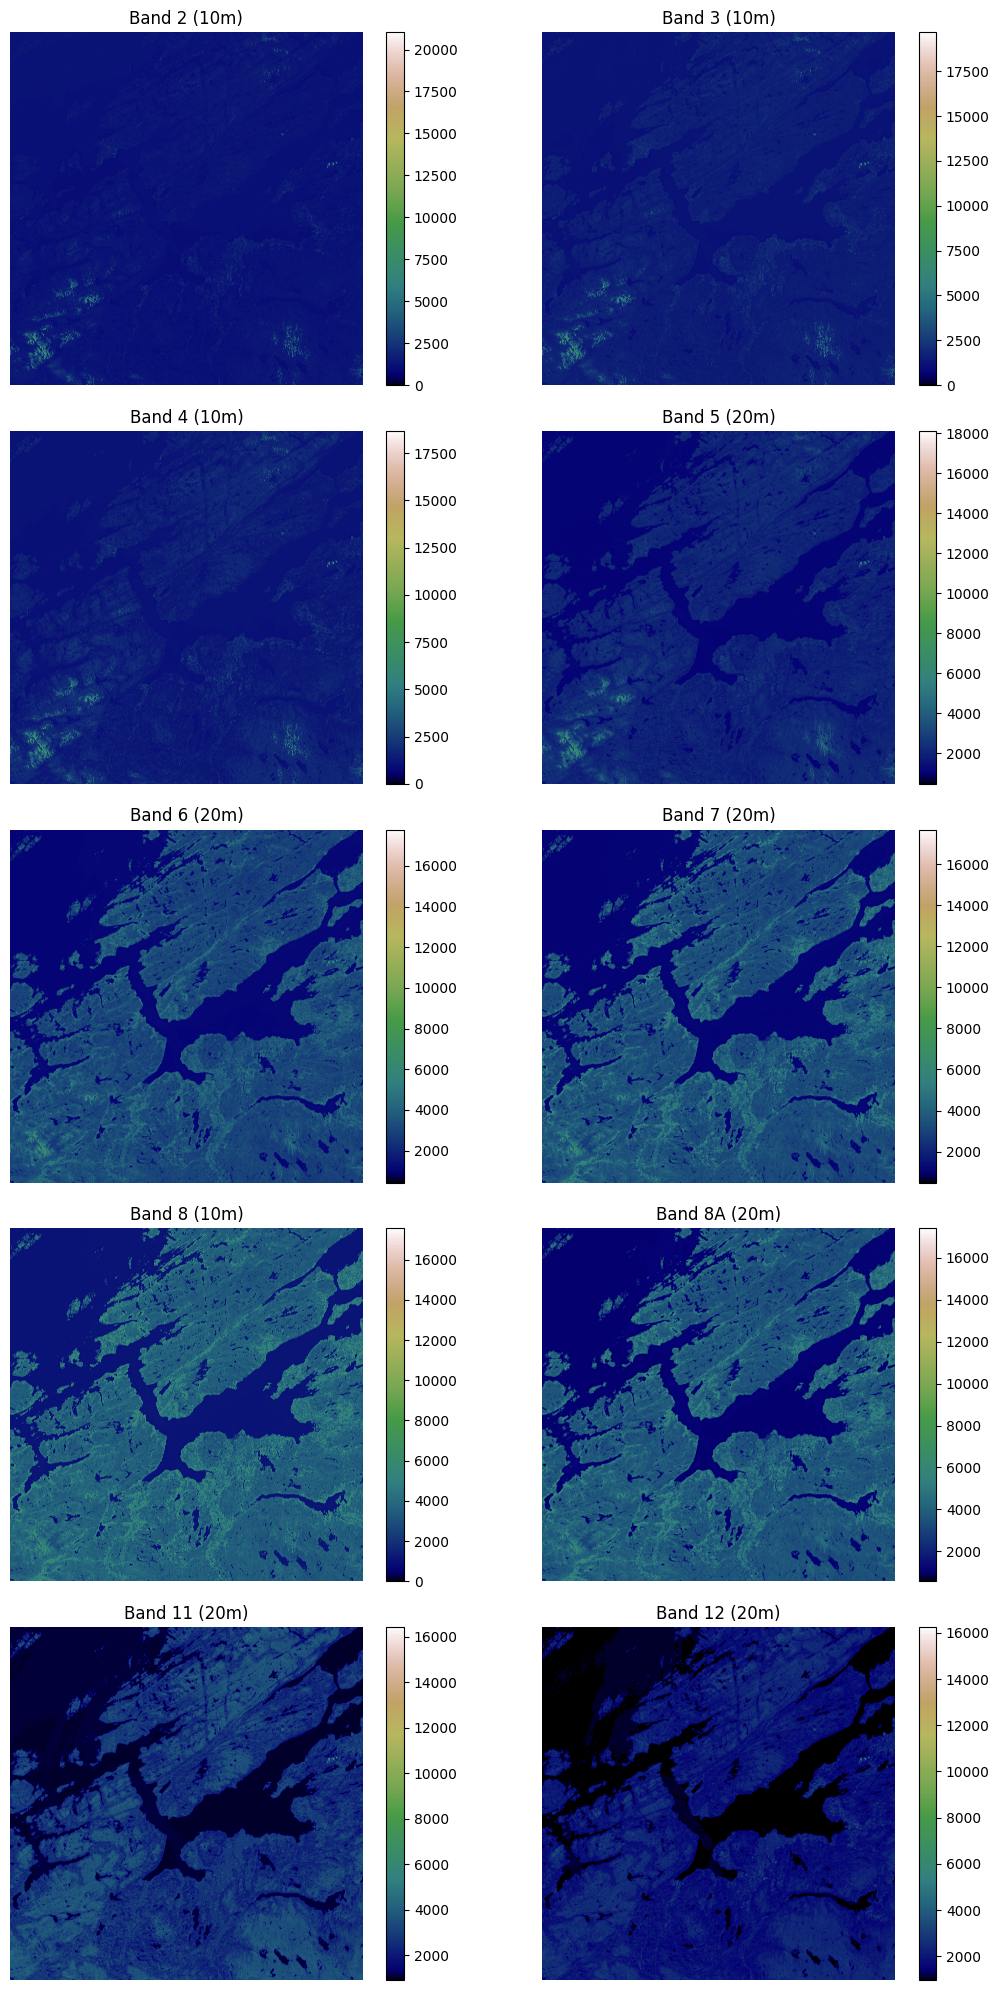

In [ ]:


# Titles aligned with band names
titles = [
    "Band 2 (10m)", "Band 3 (10m)", "Band 4 (10m)",
    "Band 5 (20m)", "Band 6 (20m)", "Band 7 (20m)",
    "Band 8 (10m)", "Band 8A (20m)", "Band 11 (20m)", "Band 12 (20m)"
]

# Loop through each band and prepare for plotting
fig, axes = plt.subplots(5, 2, figsize=(12, 20))  # 5 rows x 2 cols grid
axes = axes.flatten()

for idx, band_path in enumerate(S_sentinel_bands):
    if os.path.exists(band_path):
        with rio.open(band_path) as src:
            data = src.read(1)  # Read the first band
            
            # Plot the data on a subplot
            ax = axes[idx]
            im = ax.imshow(data, cmap='gist_earth')
            ax.set_title(titles[idx])
            ax.axis('off')  # Remove axes for cleaner visuals
            
            # Add a colorbar
            plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    else:
        print(f"File {band_path} does not exist.")

# Remove any empty subplots
for idx in range(len(S_sentinel_bands), len(axes)):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [98]:
# Load the bands into separate lists based on resolution

bands_10m = []
bands_20m = []

for band_path in S_sentinel_bands:
    if "10m" in band_path:  # Identify 10m bands
        with rio.open(band_path) as src:
            bands_10m.append(src.read(1))  # Read the first band
    elif "20m" in band_path:  # Identify 20m bands
        with rio.open(band_path) as src:
            bands_20m.append(src.read(1))  # Read the first band

# Create separate stacks for 10m and 20m bands
stack_10m = np.stack(bands_10m) if bands_10m else None
stack_20m = np.stack(bands_20m) if bands_20m else None

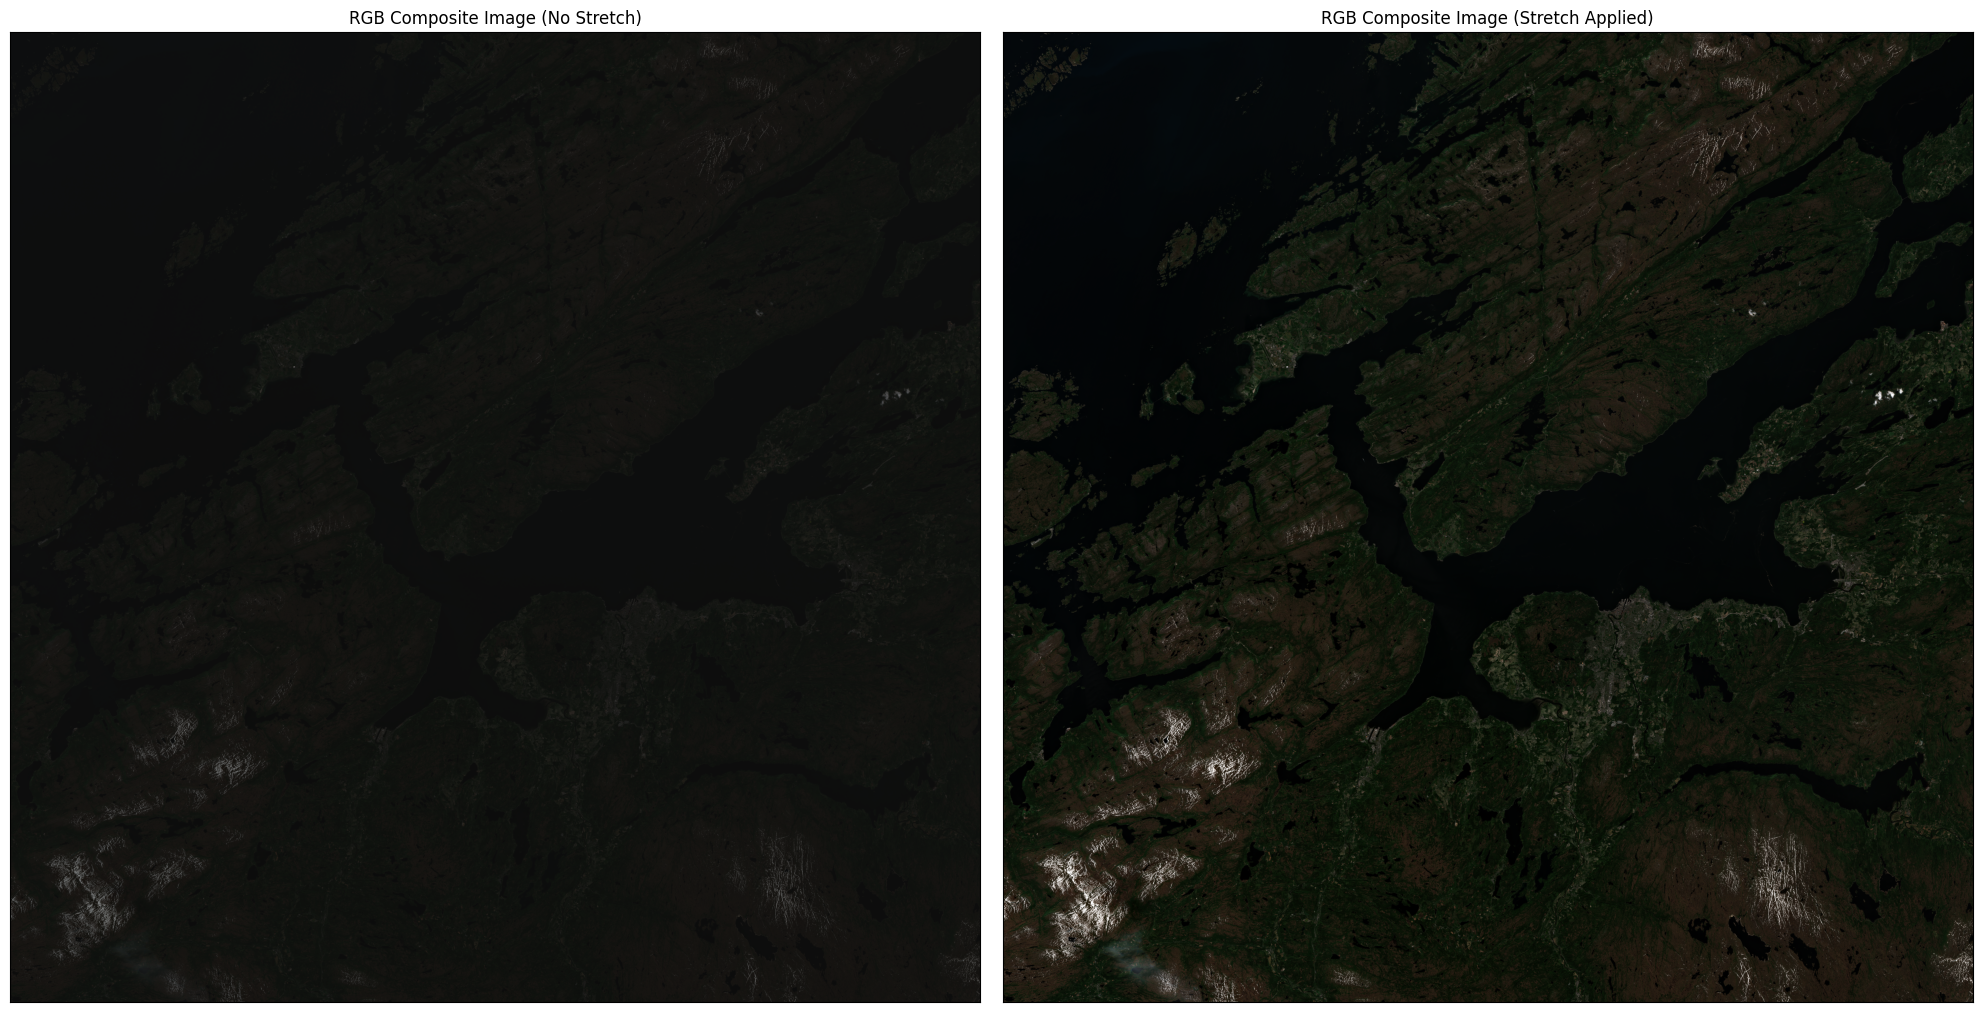

In [100]:
# RGB Composite Image without and with Strech

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 row, 2 columns

# Plot the non-stretched RGB image
plot_rgb(
    stack_10m,
    rgb=(2, 1, 0),
    stretch=False,  # No stretch applied
    ax=axes[0],  # First subplot
    title="RGB Composite Image (No Stretch)"
)

# Plot the stretched RGB image
plot_rgb(
    stack_10m,
    rgb=(2, 1, 0),
    stretch=True,  # Stretch applied
    str_clip=0.2,
    ax=axes[1],  # Second subplot
    title="RGB Composite Image (Stretch Applied)"
)

# Display the plots
plt.tight_layout()
plt.show()


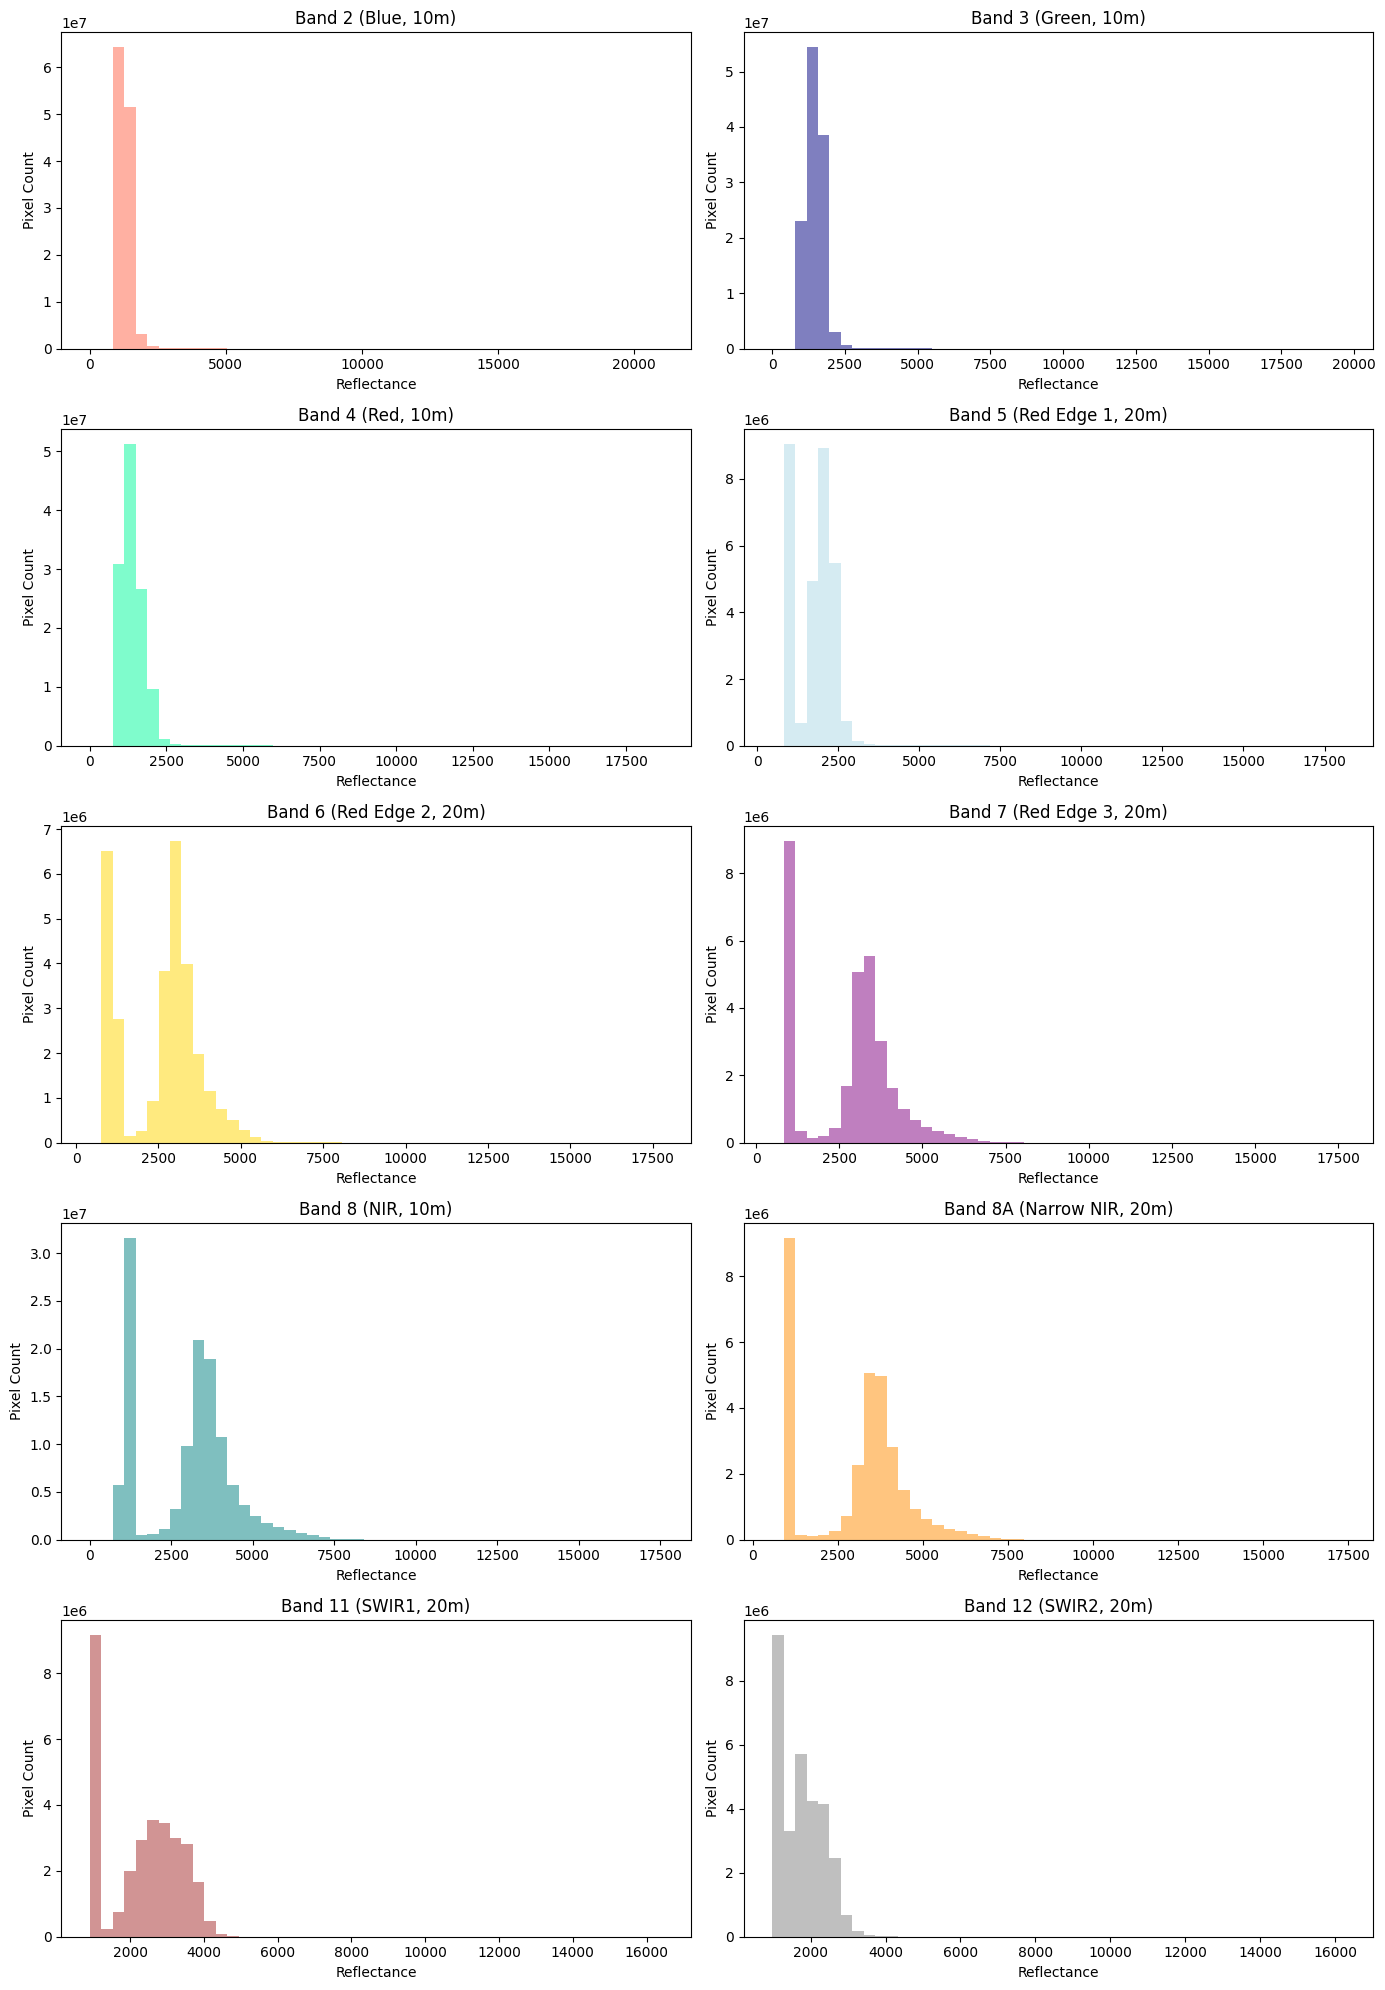

In [ ]:


# Manually reorder the bands in the desired sequence
desired_order = [
    bands_10m[0],  # Band 2 (Blue, 10m)
    bands_10m[1],  # Band 3 (Green, 10m)
    bands_10m[2],  # Band 4 (Red, 10m)
    bands_20m[0],  # Band 5 (Red Edge 1, 20m)
    bands_20m[1],  # Band 6 (Red Edge 2, 20m)
    bands_20m[2],  # Band 7 (Red Edge 3, 20m)
    bands_10m[3],  # Band 8 (NIR, 10m)
    bands_20m[3],  # Band 8A (Narrow NIR, 20m)
    bands_20m[4],  # Band 11 (SWIR1, 20m)
    bands_20m[5]   # Band 12 (SWIR2, 20m)
]

# Titles for the reordered bands
titles = [
    "Band 2 (Blue, 10m)", "Band 3 (Green, 10m)", "Band 4 (Red, 10m)",
    "Band 5 (Red Edge 1, 20m)", "Band 6 (Red Edge 2, 20m)", "Band 7 (Red Edge 3, 20m)",
    "Band 8 (NIR, 10m)", "Band 8A (Narrow NIR, 20m)", "Band 11 (SWIR1, 20m)", "Band 12 (SWIR2, 20m)"
]

# Colors for each band
colors = [
    "tomato", "navy", "MediumSpringGreen", "lightblue", 
    "gold", "purple", "teal", "darkorange", "brown", "gray"
]

# Number of bands
n_bands = len(desired_order)

# Create subplots for all histograms
fig, axes = plt.subplots(nrows=(n_bands + 1) // 2, ncols=2, figsize=(14, 20))  # Adjust size as needed
axes = axes.ravel()  # Flatten to iterate easily

# Plot each band's histogram
for i, band in enumerate(desired_order):
    axes[i].hist(
        band.flatten(),  # Flatten to 1D array for histogram
        bins=50,         # Number of bins
        color=colors[i],
        alpha=0.5
    )
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Reflectance")
    axes[i].set_ylabel("Pixel Count")

# Hide any unused subplots
for ax in axes[len(desired_order):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
# Extract bands for indices
nir_band = bands_10m[3]  # Band 8
red_band = bands_10m[2]  # Band 4
green_band = bands_10m[1] 
blue_band = bands_10m[0] 


nir_band = nir_band / 10000.0
red_band = red_band / 10000.0
green_band = green_band / 10000.0
blue_band = blue_band / 10000.0

<Figure size 1200x800 with 0 Axes>

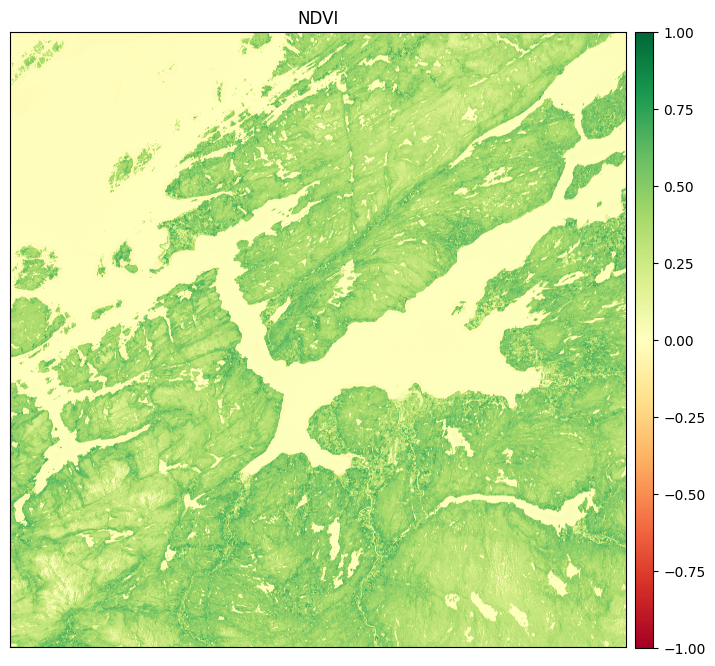

NDVI min: -1.0 max: 1.0


In [135]:
# NDVI plot

# Calculate NDVI using the formula
ndvi = (nir_band - red_band) / (nir_band + red_band)

# Plot NDVI
plt.figure(figsize=(12, 8))
ep.plot_bands(ndvi, cmap='RdYlGn', figsize=(12, 8), cbar=True, title="NDVI")
plt.show()

# Optional: Print the range of NDVI values
print("NDVI min:", np.min(ndvi), "max:", np.max(ndvi))

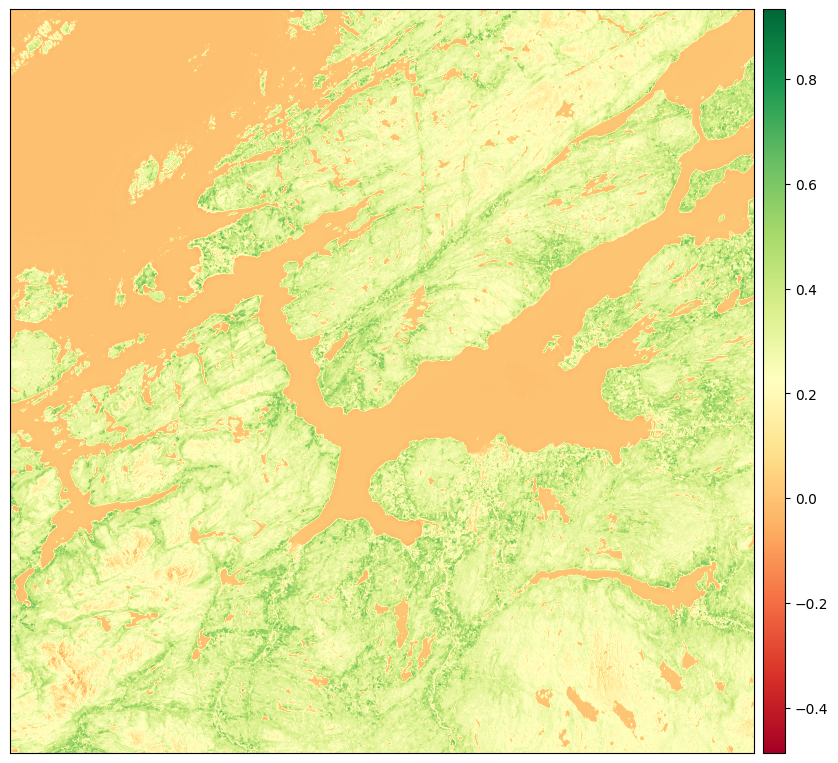

In [134]:
# Soil Adjusted Vegetation Index (SAVI) plot

L = 0.5

savi = ((nir_band - red_band) / (nir_band + red_band + L)) * (1 + L)
ep.plot_bands(savi, cmap="RdYlGn", cols=1, figsize=(10, 14))
plt.show()

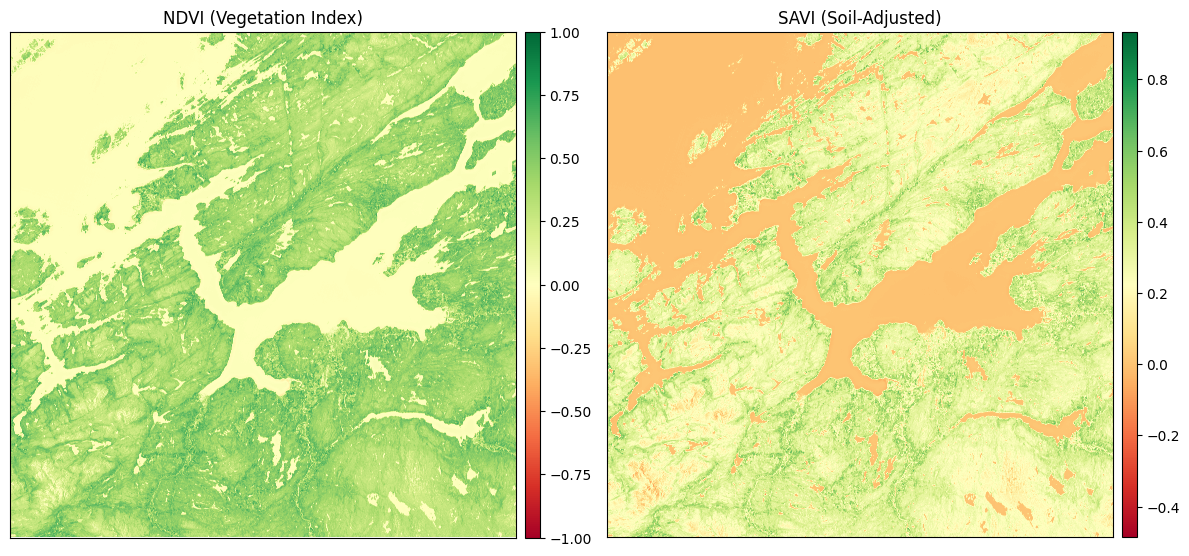

<Figure size 640x480 with 0 Axes>

In [ ]:


# Stack indices into a 3D array for ep.plot_bands
index_stack = np.stack([ndvi, savi])

# Create titles for each index
titles = ["NDVI (Vegetation Index)", "SAVI (Soil-Adjusted)"]

# Plot the indices using ep.plot_bands
ep.plot_bands(
    index_stack,
    cmap="RdYlGn",           # Colormap suitable for vegetation and moisture indices
    figsize=(12, 12),        # Adjust figure size
    cols=2,                  # Number of columns for the grid
    title=titles,            # Titles for each subplot
    cbar=True,               # Add colorbars for better interpretation
)



plt.tight_layout()
plt.show()
